In [1]:
## FIRE simulator

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
from sympy import Symbol, solveset, Interval

# 시각화 관련
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)


## 퀀트함수 ## 절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
from library.quant_functions import anal_funcs, data_funcs

## Func

In [10]:
def cal_kap(s, c, r, t):
    '''
    * s: seed, c: cashflow, r: return(Y), t: terms(Y)
    * k: 달성자산
    '''
    k = s*((1+r)**t) + c*((1-((1+r)**t)))/(1-(1+r))
    return(k)

In [11]:
def cal_ret(k, s, c, t):
    '''
    * k: kapital, s: seed, c: cashflow, t: terms(Y)
    * r: 요구수익률
    '''
    r=Symbol('r')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, r, Interval(0, 999))
    solve_r = float(list(val)[0])
    return(np.round(solve_r, 2))

In [13]:
def cal_term(k, s, c, r):
    '''
    * k: kapital, s: seed, c: cashflow, r: return(Y)
    * t: 요구 기간
    '''
    t=Symbol('t')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, t, Interval(0, 999))
    solve_t = float(list(val)[0])
    return(np.round(solve_t, 2))

## Proc

In [16]:
## seed
s = 34000 * 1e4
## Kapital
k = 150000 *1e4
## term
d = (dt.datetime(2028, 5, 31) - dt.datetime.now()).days
t = int(d/365) ## 연으로 변환
## return
r = 0.43
## cash flow
c = 120*1e4*12

In [20]:
demanded_term = cal_term(k, s, c, r)
demanded_return = cal_ret(k, s, c, t)
expected_kapital = cal_kap(s, c, r, t)

In [42]:
print(f"기간의 충분성: {demanded_term <= t}, 요구기간: {demanded_term}Y, 가용기간: {t}Y")
print(f"수익률의 충분성: {demanded_return <= r}, 요구수익률: {demanded_return*1e2}%, 가용수익률: {r*1e2}%")
print(f"자산의 적절성: {expected_kapital >= k}, 기대자산: {expected_kapital/1e4:.0f}, 목표자산: {k/1e4:.0f}")

기간의 충분성: True, 요구기간: 4.27Y, 가용기간: 5Y
수익률의 충분성: True, 요구수익률: 35.0%, 가용수익률: 43.0%
자산의 적절성: True, 기대자산: 196068, 목표자산: 150000


In [44]:
temp_ls = []
for n in range(1, 2000):
    r = n*0.001
    gap = np.e**r - (1+r)
    temp_ls.append((r, gap))

In [46]:
temp_df = pd.DataFrame(temp_ls, columns=['r', 'gap'])

In [53]:
np.e

2.718281828459045

<AxesSubplot:xlabel='r', ylabel='gap'>

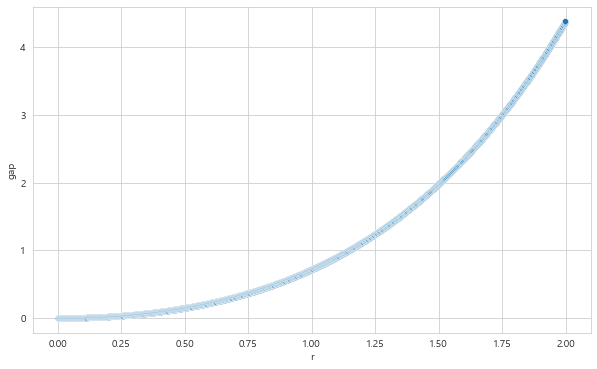

In [141]:
sns.scatterplot(data = temp_df, x = 'r', y = 'gap')